# Matrices as Images

In our first reading on matrices, we said that one important reason data scientists have to know how to work with matrices is that, from the perspective of a computer, images are basically just matrices. 

Uh... what?

Most of us are accustomed to thinking about digital images as a grid of pixels, where each pixel is a square that contains a single color. But as we have learned in our previous classes, everything in a computer is a number, including colors. So instead of thinking of an image as a grid of little boxes filled with colors, computer see an image as a grid of numbers where each number represents a color. And a grid of numbers is nothing but a matrix!

To illustrate, let's load a simple greyscale `.png` image and display it using the `pyplot.imshow` function, which we'll talk about more below:

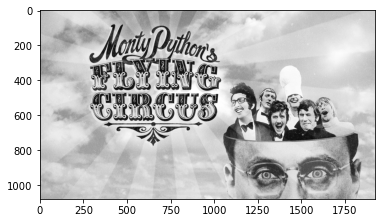

In [1]:
from matplotlib import image
from matplotlib import pyplot
import numpy as np

# load image as pixel array
image = image.imread("img/monty-python-flying-circus.png")
pyplot.imshow(image, cmap="gray", vmin=0, vmax=1)

(If you don't know [Monty Python's Flying Circus](https://en.wikipedia.org/wiki/Monty_Python%27s_Flying_Circus), it was a British comedy group from the 1970s. And despite what you might assume given the prevalence of snake images on Python websites, this group is [the actual origin of the name of the Python programming language!](https://en.wikipedia.org/wiki/Python_(programming_language)#Design_philosophy_and_features))

But what underlies this image? It's our old friend the numpy array! Namely a 1080 x 1920 matrix, where each cell contains a single number between 0 and 1 corresponding to how dark (values close to 0) or light (values close to 1) the corresponding pixel should be drawn:

In [2]:
type(image)


numpy.ndarray

In [3]:
image.shape


(1080, 1920)

In [4]:
image


array([[0.65882355, 0.7254902 , 0.7372549 , ..., 0.8       , 0.8       ,
        0.8156863 ],
       [0.78431374, 0.7372549 , 0.70980394, ..., 0.8039216 , 0.8235294 ,
        0.84705883],
       [0.69411767, 0.72156864, 0.7764706 , ..., 0.8235294 , 0.827451  ,
        0.827451  ],
       ...,
       [0.62352943, 0.654902  , 0.7490196 , ..., 0.8156863 , 0.8039216 ,
        0.8156863 ],
       [0.6666667 , 0.6313726 , 0.7411765 , ..., 0.8392157 , 0.7764706 ,
        0.7372549 ],
       [0.6784314 , 0.72156864, 0.68235296, ..., 0.8       , 0.79607844,
        0.8       ]], dtype=float32)

## Image Manipulation

Because this is just a numpy array, we can manipulate it with basic numpy tools! For example, to make everything darker, we can just make all the numbers smaller by multiplying by 0.25:

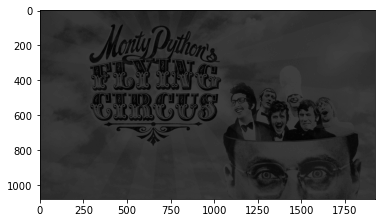

In [5]:
darker = image * 0.25
pyplot.imshow(darker, cmap="gray", vmin=0, vmax=1)

We can also do more complicated manipulations. Suppose we wanted to increase the contrast of the image. Since values close to 0 are darker and values close to 1 are lighter, we can increase the image contrast by moving values towards the extremes. How might we accomplish that?

Well, if we only wanted values that were black or white, we convert our greyscale image to a purely black and white image by rounding the values to the nearest integer!

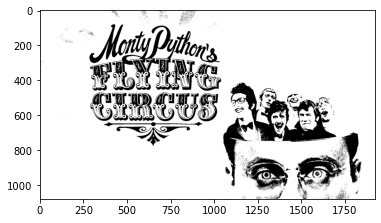

In [6]:
# Convert Greyscale to Two-Tone
two_tone = np.round(image)
pyplot.imshow(two_tone, cmap="gray", vmin=0, vmax=1)

We can also up the contrast without going all the way to a two-tone image, although we have to be a little more clever to do so. Can you think of how we might accomplish this? Stop before reading ahead for a minute and trying and think of a way of moving all the values in this matrix away from 0.5 towards 0 and 1.

Seriously, think about it!

OK, so here's my solution:

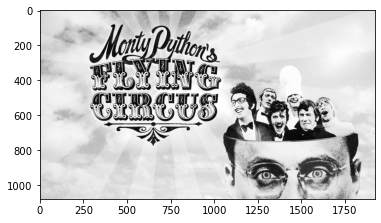

In [7]:
def increase_contrast(image):
    re_center_and_re_scale = (image - 0.5) * 2

    # OK, small trick here: you can't raise a negative number to 
    # a power less than 1, but we want our negative values to stay 
    # negative. So we take the absolute value, rise it to the power
    # less than 1, then recover the original sign with `np.sign`.
    
    contrast_shifted = np.abs(re_center_and_re_scale) ** 0.5 * np.sign(re_center_and_re_scale)
    shift_back = (contrast_shifted / 2) + 0.5
    return shift_back

pyplot.imshow(increase_contrast(image), cmap="gray", vmin=0, vmax=1)

Basically, the solution leverages the fact that when a positive number between 0 and 1 is raised to a power less than 1, the result will increase in size by a larger amount the closer the original number is to 0 (while values close to 1 barely change). For example, if we raise values to 0.5 (in other words, take the square root of values), 0.1 becomes 0.31, while 0.9 only becomes 0.95: 


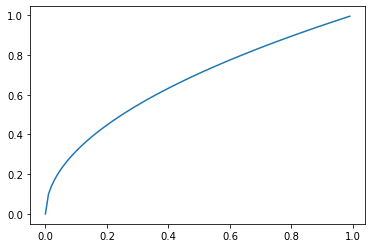

In [8]:
zero_to_one = np.arange(0, 1, 0.01)
pyplot.plot(zero_to_one, np.sqrt(zero_to_one))

So if we shift all the value down by 0.5 and double them, then values that *used* to be near 0.5 (the middle "grey" value we want to move values away from) will now be near 0, while values that were near 0 or 1 will now be close to -1 or 1. If we then take the square root, values near 0 will be moved towards the extremes of -1 and 1. Then we just divide the result by 2 and add 0.5 to shift them back to the 0 - to - 1 range we started with, and values that used to be near 0.5 will now be closer to 0 or 1!

Indeed, we can even support arbitrary changes in contrast by allowing the user to specify the exponent we use:

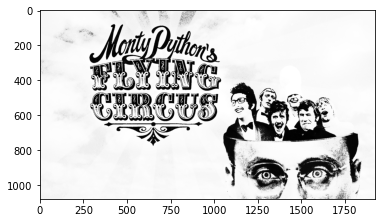

In [9]:
def increase_contrast(image, increase=2):
    re_center_and_re_scale = (image - 0.5) * 2

    # OK, small trick here: you can't raise a negative number to
    # a power less than 1, but we want our negative values to stay
    # negative. So we take the absolute value, rise it to the power
    # less than 1, then recover the original sign with `np.sign`.

    contrast_shifted = np.abs(re_center_and_re_scale) ** (1 / increase) * np.sign(
        re_center_and_re_scale
    )
    shift_back = (contrast_shifted / 2) + 0.5
    return shift_back


pyplot.imshow(increase_contrast(image, 10), cmap="gray", vmin=0, vmax=1)

Voilà! Now you can stop paying Photoshop for a license and edit all your photos yourself! OK, we're probably not there yet, but this *is* precisely what programs like Photoshop are doing behind the scenes. 

## Color Images

As you've hopefully seen with this greyscale image, thinking of images as matrices is a very powerful perspective, and one that underlies all digital image processing. 

But how does this work with color images? The answer depends a little on the color encoding that a photo format uses, but with many formats, the color of a pixel will actually be represented by 3 numbers per pixel, corresponding to the relative contributions of the primary colors of red, green, and blue that make up the final color. This can either be represented in computers as a matrix where each entry is a tuple of three values, or by adding a third dimension to our array (something we'll talk more about soon).

## Exercises 

1. Import the Monty Python's Flying Circus image used above and plot it with `pyplot.imshow`. 
2. Using numpy manipulations, make the image lighter. Remember that lighter values are values closer to 1, so you are trying to move values towards 1.
3. What happens if you transpose an image matrix?